In [1]:
from scipy import stats
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
import xlwings as xw
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import math

In [2]:
wb = xw.Book('D:\Published\exposomeProjUvA\FDRcontrolled.xlsx')

In [3]:
sheet = wb.sheets("sheet1").used_range.value
df = pd.DataFrame(sheet)

In [4]:
df = df.rename(columns=df.iloc[0]).iloc[1:].reset_index().drop(columns="index")

In [5]:
for i in list(df.columns[3:]):
    for j in range(10):
        df[i][j] = df[i][j]*100

In [6]:
df

,Recall,Samples,total,P(TP) >= 0.50 (19% FDR),P(TP) >= 0.78 (10% FDR),P(TP) >= 0.89 (5% FDR)
0,1.0,PestMix_1 ppb_No Tea,82.0,17.07,2.44,2.44
1,2.5,PestMix_2.5 ppb_No Tea,106.0,68.87,33.96,28.3
2,5.0,PestMix_5 ppb_No Tea,283.0,64.66,40.28,20.85
3,10.0,PestMix_10 ppb_No Tea,314.0,56.05,42.99,23.25
4,25.0,PestMix_25 ppb_No Tea,560.0,56.79,43.57,26.61
5,50.0,PestMix_50 ppb_No Tea,292.0,48.29,32.19,17.81
6,100.0,PestMix_100 ppb_No Tea,709.0,66.01,35.83,12.98
7,1000.0,PestMix_1000 ppb_No Tea,1389.0,65.95,38.16,18.57
8,1000.0,PestMix_1000 ppb_10x Diluted Tea,1334.0,59.82,36.51,19.19
9,1000.0,PestMix_1000 ppb_100x Diluted Tea,1524.0,62.47,36.29,15.49


C:\Users\resea\AppData\Local\Temp\ipykernel_19772\3621425734.py:36: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  plt.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)


<Figure size 1000x500 with 0 Axes>

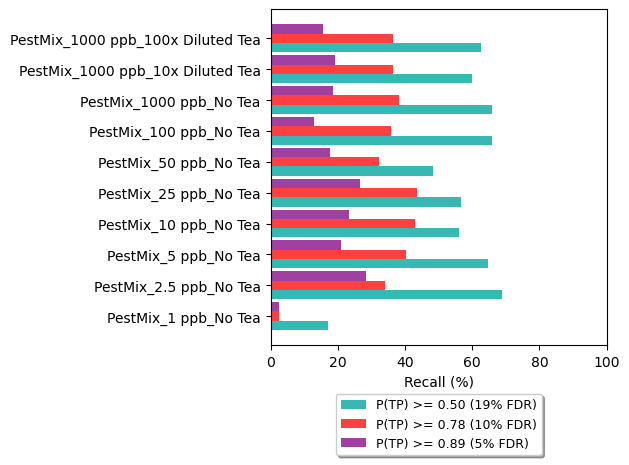

In [8]:
width = 10
height = 5
plt.figure(figsize=(width, height))

sample = list(df["Samples"])
data = {
    'P(TP) >= 0.50 (19% FDR)': list(df["P(TP) >= 0.50 (19% FDR)"]),
    'P(TP) >= 0.78 (10% FDR)': list(df["P(TP) >= 0.78 (10% FDR)"]),
    'P(TP) >= 0.89 (5% FDR)': list(df["P(TP) >= 0.89 (5% FDR)"]),
}

y = np.arange(len(sample))  # the label locations
width = 0.3  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for l, va in data.items():
    offset = width * multiplier
    if multiplier % 3 == 2:
        rects = ax.barh(y+ offset,va, width, label=l, color='purple', alpha=0.75)
    elif multiplier % 3 == 1:
        rects = ax.barh(y+ offset,va, width, label=l, color='red', alpha=0.75)
    elif multiplier % 3 == 0:
        rects = ax.barh(y+ offset,va, width, label=l, color='lightseagreen', alpha = 0.9)
    #ax.bar_label(rects, padding=3, fontsize="10")
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Recall (%)', size = 10)
ax.set_yticks(y + width, sample, size = 10)
ax.set_xlim(0, 100)

ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.125),
          ncol=1, fancybox=True, shadow=True, fontsize="9")
plt.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)
plt.savefig('Fig3FDR.png', dpi=600)#, transparent=True)
#plt.close()